In [140]:
import numpy as np
import pandas as pd
import math
import io
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import scipy.optimize
import scipy.spatial
from statsmodels.formula.api import ols
import statsmodels.formula.api as smapi

## PART A Exploratory Data Analysis

In performing this Exploratory Data Analysis, histograms or boxplots will be used for univariate analysis and pivot tables will be used for the bivariate.  

An overall look at this data shows that while certain numerical variables such as TIME and YEARS do not seem to affect each other, other variables such as SALES and CALLS significantly impact each other.  

Also, looking at CALLS and TIME, there is an obvious correlation depicted.  

One would also consider the relationship between TIME and SALES, seemingly we would expect a significant correlation, but there does not seem to be a linear relationship involved.  

Overall, YEARS was the main variable that did not seem to have any impact on any of the other variables.

Here are the list of variables:
* SALES represents the number sales made this week.
* CALLS represents the number of sales calls made this week.
* TIME represents the average time per call this week.
* YEARS represents years of experience in the call center.
* TYPE represents the type of training the employee received.

In [145]:
df = pd.read_excel('math.xlsx')

In [146]:
df.head()

,Sales (Y),Calls (X1),Time (X2),Years (X3),Type
0,48,171,13.0,5,ONLINE
1,32,139,16.9,4,NONE
2,44,165,15.7,3,ONLINE
3,47,186,13.5,3,ONLINE
4,41,180,14.0,2,ONLINE


In [50]:
df.groupby('Type').mean()

,Sales (Y),Calls (X1),Time (X2),Years (X3)
Type,,,,
GROUP,42.766667,156.566667,15.853333,2.466667
NONE,39.300000,140.300000,16.290000,2.050000
ONLINE,43.720000,173.700000,14.648000,2.300000


In [92]:
df.Type.unique()

array(['ONLINE', 'NONE', 'GROUP'], dtype=object)

In [54]:
df.groupby('Type').count().nunique()

Sales (Y)     3
Calls (X1)    3
Time (X2)     3
Years (X3)    3
dtype: int64

In [55]:
df.Type.value_counts()

ONLINE    50
GROUP     30
NONE      20
Name: Type, dtype: int64

In [147]:
df.describe()

,Sales (Y),Calls (X1),Time (X2),Years (X3)
count,100.000000,100.000000,100.000000,100.00000
mean,42.550000,161.880000,15.338000,2.30000
std,7.170894,18.434311,2.299881,1.41778
min,21.000000,120.000000,10.000000,0.00000
25%,39.000000,149.000000,13.600000,1.00000
50%,43.000000,160.500000,15.050000,2.00000
75%,47.000000,176.250000,17.075000,3.00000
max,67.000000,201.000000,20.000000,5.00000


In [148]:
def zScoreSample(x, mean, std, n):
    sigma = std / math.sqrt(n)
    z = x - mean / sigma
    return z

In [149]:
# trying to apply Central Limit Theorem to the Sales column, what is the probability that a random variable x:
# is less than 40 sales, given a sample distribution of 50
salesZScoreSample = zScoreSample(40, 42.55, 7.17, 50)
print(salesZScoreSample)

-1.9628919658125454


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
Sales (Y)     100 non-null int64
Calls (X1)    100 non-null int64
Time (X2)     100 non-null float64
Years (X3)    100 non-null int64
Type          100 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB


In [151]:
def describe_column(col):
    return col.describe()

In [152]:
describe_column(df['Sales (Y)'])

count    100.000000
mean      42.550000
std        7.170894
min       21.000000
25%       39.000000
50%       43.000000
75%       47.000000
max       67.000000
Name: Sales (Y), dtype: float64

In [153]:
# numerical variables
sales = df['Sales (Y)']
calls = df['Calls (X1)']
time = df['Time (X2)']
years = df['Years (X3)']

In [154]:
# categorical variable
type = df['Type']

## Variable Analysis on SALES
Sales is the dependent variable in this analysis.  

The average employee generates around 43 sales with a STD of 7.  

This range is a fair spread for proper analysis.  

It looks like the outliers in this set are pretty far away from the mean, but it doesn’t skew the data.  

The graph exhibits what appears to be a normal distribution of data points along a curve. 

In [158]:
describe_column(df['Sales (Y)'])

count    100.000000
mean      42.550000
std        7.170894
min       21.000000
25%       39.000000
50%       43.000000
75%       47.000000
max       67.000000
Name: Sales (Y), dtype: float64

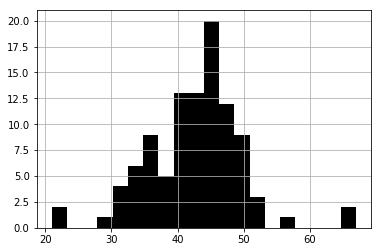

In [155]:
sales.hist(bins=20, color='black')

## Variable Analysis on CALLS
For the discrete numerical value, Calls, there was a wide spread of data.  

The mean was around 161 with a STD of around 19.  

Considering the range of this variable, it was the largest spread of them all.  

The quartile ranges started at 149 for 25%, 160 for 50%, and 176 for 75%.  


In [156]:
describe_column(df['Calls (X1)'])

count    100.000000
mean     161.880000
std       18.434311
min      120.000000
25%      149.000000
50%      160.500000
75%      176.250000
max      201.000000
Name: Calls (X1), dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2436c3c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2436ca58>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a24361fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2436ce80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a24373400>],
 'means': []}

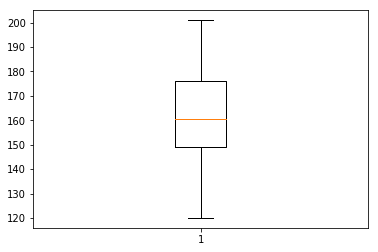

In [66]:
plt.boxplot(calls)

## Variable Analysis on YEARS
Years is a discrete variable in this dataset as well of independent type.  

The STD was above one, which makes it a useful variable.  

The average years for employees at this company was 2.3.  

No one had worked more than 5 years here.  

The graph shows us most of the data lies between 1 year and 3 years for the majority of employees.


In [159]:
describe_column(df['Years (X3)'])

count    100.00000
mean       2.30000
std        1.41778
min        0.00000
25%        1.00000
50%        2.00000
75%        3.00000
max        5.00000
Name: Years (X3), dtype: float64

(array([ 9., 22., 29., 20., 10., 10.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <a list of 6 Patch objects>)

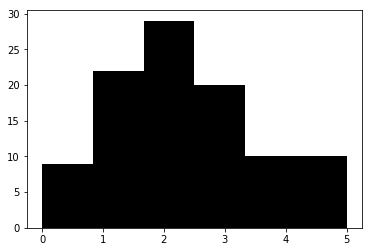

In [68]:
plt.hist(years, bins=6,color='black')

## Bivariate Analysis on TIME and CALLS
When considering the number of calls to be a function of the average time an employee spends on calls, the scatterplot shows almost a negative correlation here.  

Rightfully so, this relationships is plausible.  

If an employee spends a large amount of time on average with the customer, they are only able to make a certain number of calls as times progresses.  Contrary to an employee who spends a very limited amount of time per call, we would expect them to have time to make more calls.


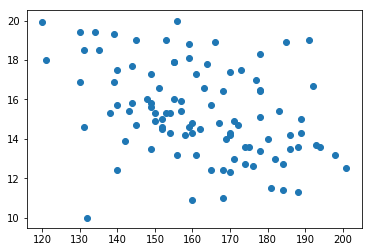

In [69]:
plt.scatter(calls, time)

## Bivariate Analysis on SALES and CALLS
Sales being the dependent variable and calls, the independent variable, it’s not surprising to see a drastic positive, linear relationship here taking place here with a few outliers.  

An inference can be made on production by considering the number of sales an employee makes to be positively correlated with the number of calls they produce.


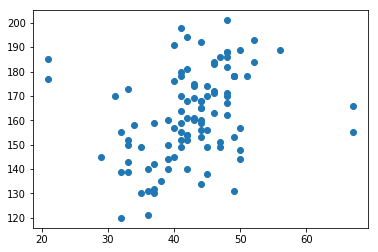

In [70]:
plt.scatter(sales, calls)

## Pairplot on entire data

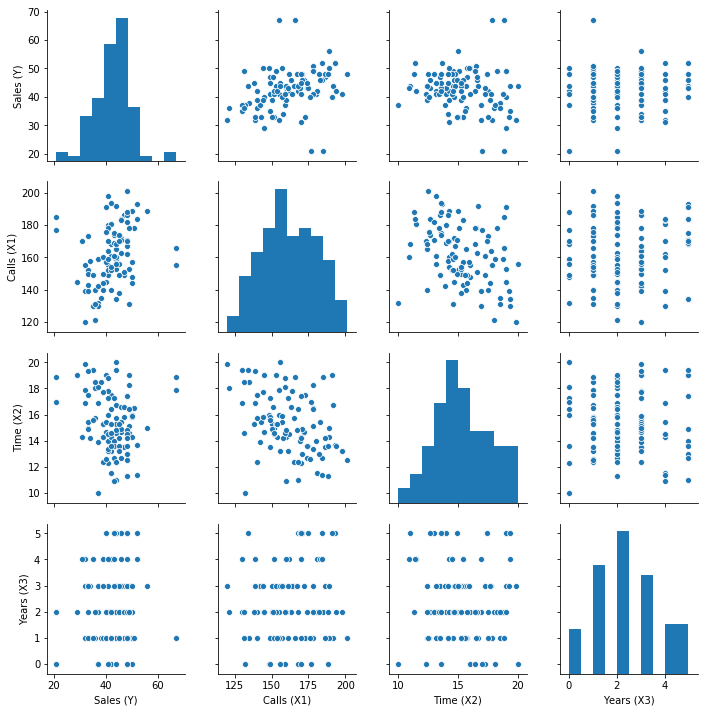

In [160]:
sns.pairplot(df)

## Conclusion of EDA

It is surprising to see that YEARS has very little impact on most of the variables.  Usually the length of time an employee has accumulated in the industry profoundly affects their performance.  

Yet, in sales there seems to be little correlation.  This inference may conclude that a sales employee whose number of years in industry is less than the mean will still have a high probability of generating the most sales.  
Another interesting observation was the outcome of online training and the number of sales.  

This raises the question of the validity of online training in the positive.  Are these online courses more effective in sales than group training courses?  This would be a very interesting hypothesis to test when during this analysis. 


# Part B: Hypothesis Testing and Confidence Intervals

#### List of confidence intervals to compute

The data file includes four hypotheses labeled 1 - 4

1) Mean sales per week exceeds 41.5 per salesperson

2) Proportion receiving online training is less than 55%

3) Mean calls made among those with no training is less than 145

4) Mean time per call is greater than 15 minutes

Perform the hypothesis test for each speculation in order to see if there is evidence to support the manager's belief. 

Compute confidence intervals (the required confidence level is included with the speculations) for each of the variables described in 1-4, and interpret these intervals.
Write a report about the results, distilling down the results in a way that would be understandable to someone who does not know statistics. Clear explanations and interpretations are critical.


### Z_c Chart for  Confidence Intervals
LOC | Z_c

In [161]:
Z_c_95 = 1.96
# used the most
Z_c_99 = 2.58
Z_c_98 = 2.33
Z_c_90 = 1.65
Z_c_85 = 1.44
Z_c_80 = 1.28

* C:----------           | 0.90  | 0.95  | 0.98  | 0.99 

* alpha ------       | 0.10  | 0.05  | 0.02  | 0.01

* One-tail ---    | 1.28 | 1.65 | 2.05 | 2.33

* Two-tail(+-) | 1.65 | 1.96 | 2.33 | 2.58

#### Question 1) 
#### Alternative Hypothesis: The mean sales per week exceeds 41.5 per salesperson
#### Null Hypothesis: Mean sales / week <= 41.5 per salesperson
- We will determine a 90% confidence interval to test the H_A

Variable Key Below
_____________________________

* m_error_1 (margin of error)
* Z_c_a (critical value of Z)
* Z_actual (actual value of Z)
* SD_sales (standard deviation for sales)
* mean_sales (mean for sales)
* sample_mean (sample mean)
* H_A_pop_mean (population mean hypothesized)
* LL (Lower Limit)
* UL (Upper Limit

In [162]:
# Sample of Sales
H_A_pop_mean = 41.5
n = 100
SD_sales = np.std(sales) 
mean_sales = np.mean(sales)
m_error_1 = Z_c_90 * (SD_sales / math.sqrt(n))
UL = round(mean_sales + m_error_1, 2)
LL = round(mean_sales - m_error_1, 2)
Z_actual = (H_A_pop_mean - mean_sales) / (SD_sales / math.sqrt(n))
p_value = 0.072
print("Standard Deviation of sales is ----> {}".format(round(SD_sales, 2)))
print("Margin of error is ----> {}".format(round(m_error_a,2)))
print("Upper Limit is ----> {}".format(round(UL, 2)))
print("Lower Limit is ----> {}".format(round(LL, 2)))
print("Z score is ----> {}".format(round(Z_actual, 2)))
print("p-value is ----> {}".format(p_value))
print("Confidence Interval is ----> ({}, {})".format(LL, UL))
print("Sample mean of sales ----> {}".format(round(mean_sales, 4)))
print("The critical value of Z for a 90% LOC is set at ----> {}".format(Z_c_90))

Standard Deviation of sales is ----> 7.13
Margin of error is ----> 0.08
Upper Limit is ----> 43.73
Lower Limit is ----> 41.37
Z score is ----> -1.47
p-value is ----> 0.072
Confidence Interval is ----> (41.37, 43.73)
Sample mean of sales ----> 42.55
The critical value of Z for a 90% LOC is set at ----> 1.65


#### Question 1 Conclusion:  

This is a right-tail test, therefore given that our actual Z score is lower than our critical Z score, we must fail to reject the null hypothesis.  The results were not significant enough to fall into the rejection region.  There is NO sufficient evidence to support the claim that the mean sales per week exceeds 41.5 per salesman.

#### Question 2) 
#### Alternative Hypothesis: Proportion receiving online training < 55%
#### Null Hypothesis: Proportion recieving online training >= 55%

- We will determine a 90% confidence interval to test the H_A

Variable Key Below:
____________________________
* m_error_2 (margin of error)

* Z_c_90 (critical value of Z)
* Z_actual (actual value of Z)
* SD_online (standard deviation for proportion)
* sample_proportion 
* H_A_pop_mean (population mean hypothesized)
* LL (Lower Limit)
* UL (Upper Limit

In [163]:
# Proportion of online training
H_A_pop_mean = 0.55
n = 100
num_of_online = df.Type.value_counts()[0]
sample_proportion = num_of_online / n
SD_online = math.sqrt(H_A_pop_mean * (1 - H_A_pop_mean)) 

m_error_2 = Z_c_90 * SD_online /math.sqrt(n)
UL = round(sample_proportion + m_error_2, 2)
LL = round(sample_proportion - m_error_2, 2)
Z_actual = (sample_proportion - H_A_pop_mean) / (SD_online / math.sqrt(n))
p_value = 0.1574

print("Standard Deviation of proportion is ----> {}".format(round(SD_online, 2)))
print("Margin of error is ----> {}".format(round(m_error_2,2)))
print("Upper Limit is ----> {}".format(round(UL, 2)))
print("Lower Limit is ----> {}".format(round(LL, 2)))
print("Z score is ----> {}".format(round(Z_actual, 2)))
print("p-value is ----> {}".format(p_value))
print("Confidence Interval is ----> ({}, {})".format(LL, UL))
print("Sample proportion of online training ----> {}".format(round(sample_proportion, 4)))
print("The critical value of Z for a 90% LOC is set at ----> {}".format(Z_c_90))

Standard Deviation of proportion is ----> 0.5
Margin of error is ----> 0.08
Upper Limit is ----> 0.58
Lower Limit is ----> 0.42
Z score is ----> -1.01
p-value is ----> 0.1574
Confidence Interval is ----> (0.42, 0.58)
Sample proportion of online training ----> 0.5
The critical value of Z for a 90% LOC is set at ----> 1.65


#### Question 2 Conclusion:  

Given that our actual Z score is not more extreme than our critical Z score, we must fail to reject the null hypothesis. There is NO sufficient evidence to support the claim that the proportion of online sales is below 55%.

#### Question 3) 
#### Alternative Hypothesis: The mean calls made among those with no training is less than 145.
#### Null Hypothesis: The mean calls made among those with no training is greater than or equal to 145.
- We will determine a 90% confidence interval to test the H_A

Variable Key Below
_____________________________

* m_error_3 (margin of error)
* Z_c_90 (critical value of Z)
* Z_actual (actual value of Z)
* SD_calls (standard deviation for calls)
* mean_calls (mean for calls)
* sample_mean (sample mean)
* H_A_pop_mean (population mean hypothesized)
* LL (Lower Limit)
* UL (Upper Limit

In [165]:
# Sample of Calls made by those with no training
H_A_pop_mean = 145
n = 20
SD_calls = 10.89
mean_calls = df.groupby('Type').mean()['Calls (X1)']['NONE']
m_error_3 = Z_c_90 * (SD_calls / math.sqrt(n))
UL = round(mean_calls + m_error_3, 2)
LL = round(mean_calls - m_error_3, 2)
Z_actual = (H_A_pop_mean - mean_calls) / (SD_calls / math.sqrt(n))
p_value = 0.027
print("Standard Deviation of calls made with no training is ----> {}".format(round(SD_calls, 2)))
print("Margin of error is ----> {}".format(round(m_error_3,2)))
print("Upper Limit is ----> {}".format(round(UL, 2)))
print("Lower Limit is ----> {}".format(round(LL, 2)))
print("Z score is ----> {}".format(round(Z_actual, 2)))
print("p-value is ----> {}".format(p_value))
print("Confidence Interval is ----> ({}, {})".format(LL, UL))
print("Sample mean of calls with no training ----> {}".format(round(mean_calls, 4)))
print("The critical value of Z for a 90% LOC is set at ----> {}".format(Z_c_90))

Standard Deviation of calls made with no training is ----> 10.89
Margin of error is ----> 4.02
Upper Limit is ----> 144.32
Lower Limit is ----> 136.28
Z score is ----> 1.93
p-value is ----> 0.027
Confidence Interval is ----> (136.28, 144.32)
Sample mean of calls with no training ----> 140.3
The critical value of Z for a 90% LOC is set at ----> 1.65


#### Question 3 Conclusion:  

Given that our actual Z score is more extreme than our critical Z score, we must reject the null hypothesis. There is sufficient evidence to support the claim that the mean calls made among those with no training is less than 145.

#### Question 4) 
#### Alternative Hypothesis: The mean time per call is greater than 15 minutes. 
#### Null Hypothesis: The mean time per call is less than or equal to 15 minutes.

- We will determine a 90% confidence interval to test the H_A

Variable Key Below
_____________________________

* m_error_4 (margin of error)
* Z_c_90 (critical value of Z)
* Z_actual (actual value of Z)
* SD_time (standard deviation for time)
* mean_time (mean for calls)
* sample_mean (sample mean)
* H_A_pop_mean (population mean hypothesized)
* LL (Lower Limit)
* UL (Upper Limit

In [166]:
# Sample of time per call
H_A_pop_mean = 15
n = 100
SD_time = np.std(time)
mean_time = np.mean(time)
m_error_4 = Z_c_90 * (SD_time / math.sqrt(n))
UL = round(mean_time + m_error_4, 2)
LL = round(mean_time - m_error_4, 2)
Z_actual = (H_A_pop_mean - mean_time) / (SD_time / math.sqrt(n))
p_value = 0.071
print("Standard Deviation of calls made with no training is ----> {}".format(round(SD_time, 2)))
print("Margin of error is ----> {}".format(round(m_error_4,2)))
print("Upper Limit is ----> {}".format(round(UL, 2)))
print("Lower Limit is ----> {}".format(round(LL, 2)))
print("Z score is ----> {}".format(round(Z_actual, 2)))
print("p-value is ----> {}".format(p_value))
print("Confidence Interval is ----> ({}, {})".format(LL, UL))
print("Sample mean of calls with no training ----> {}".format(round(mean_time, 4)))
print("The critical value of Z for a 90% LOC is set at ----> {}".format(Z_c_90))

Standard Deviation of calls made with no training is ----> 2.29
Margin of error is ----> 0.38
Upper Limit is ----> 15.72
Lower Limit is ----> 14.96
Z score is ----> -1.48
p-value is ----> 0.071
Confidence Interval is ----> (14.96, 15.72)
Sample mean of calls with no training ----> 15.338
The critical value of Z for a 90% LOC is set at ----> 1.65


#### Question 4 Conclusion:  

Given that our actual Z score is not more extreme than our critical Z score, we must fail to reject the null hypothesis. There is NO sufficient evidence to support the claim that the mean time per call is greater than 15 minutes.

# Part C: Regression and Correlation Analysis

### Simple Linear Regression between Sales and Calls

slope = 0.12373017986740606 calls
intercept =  22.520558483064313 sales


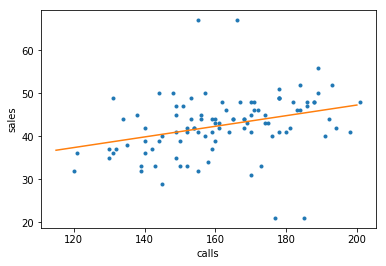

In [180]:
# Sales correlation to Calls (X1)
_ = plt.plot(calls, sales, marker ='.', linestyle='none')
_ = plt.xlabel('calls')
_ = plt.ylabel('sales')
# Linear Regression
a, b = np.polyfit(calls, sales, 1)
print('slope =', a, 'calls')
print('intercept = ', b, 'sales')
 # Least Squares line
x = np.array([115, 200])
y = a * x + b
_ = plt.plot(x, y)
plt.show()

In [143]:
lm = smapi.ols(formula="sales ~ calls", data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     11.03
Date:                Sat, 23 Feb 2019   Prob (F-statistic):            0.00126
Time:                        13:24:10   Log-Likelihood:                -333.06
No. Observations:                 100   AIC:                             670.1
Df Residuals:                      98   BIC:                             675.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5206      6.069      3.711      0.000      10.476      34.565
calls          0.1237      0.037      3.321      0.001       0.050       0.198
==============================================================================
Omnibus:                       16.913   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.159
Skew:                          -0.008   Prob(JB):                     3.92e-18
Kurtosis:                       7.386   Cond. No.                     1.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [171]:
sales_calls_ols = "{} + {}x".format(b,a)
sales_calls_ols

'22.520558483064313 + 0.12373017986740606x'

#### Relationship between sales and calls
Our coefficient of correlation (Multiple R) is only 0.318.  This suggests a weak relationship between sales and calls.  The coefficient of determination (R Square) is 0.101, which means that only 10% of the variation in sales is explained by calls in this sample.  However, testing the utility of this regression model, we see that our p-value is 0.001 for calls.  At a 95% level of confidence, this p-value is very significant.  So we can conclude that there indeed is a linear relationship between these two variables.

This model is statistically significant and can be used to explain about 10% of variation in sales.

In [178]:
# Confidence Interval for B1 at 95%
se = 0.037
margin_of_error = Z_c_95 * se
UL = round(margin_of_error + a, 3)
LL = abs(round(margin_of_error - a, 3))
print('Confidence interval is ({}, {})'.format(LL, UL))

Confidence interval is (0.051, 0.196)


*** We are 95% confident that the true value of the coefficient of calls is between 0.051 and 0.196.

### Intervals and Predictions

A) Estimates

We will estimate the average sales for a selected value of 130, 160, and 190 calls.

In [207]:
# When calls is 130
y_hat_130 = round(b + (a * 130), 2)
y_hat_130

38.61

In [222]:
# 95% Confidence Interval for average predicted sales when calls is 130
t_stat = 1.984
n = 100
Serror = 6.83307589
x_selected = 130
mean_calls = np.mean(calls)
var_calls = np.var(calls)
marginE = round(Serror * t_stat * math.sqrt(1 / n + ((x_selected - mean_calls)**2) / ((n - 1) * var_calls)), 2)
UL = round(marginE + y_hat_130, 2)
LL = y_hat_130 - marginE
print("The margin of error is {}".format(marginE))
print("We are 95% confident that the average predicted sales, when calls is 130 is between {} and {}".format(UL, LL))

The margin of error is 2.73
We are 95% confident that the average predicted sales, when calls is 130 is between 41.34 and 35.88


In [211]:
# When calls is 160
y_hat_160 = round(b + (a * 160), 2)
y_hat_160

42.32

In [221]:
# 95% Confidence Interval for average predicted sales when calls is 160
t_stat = 1.984
n = 100
Serror = 6.83307589
x_selected = 160
mean_calls = np.mean(calls)
var_calls = np.var(calls)
marginE = round(Serror * t_stat * math.sqrt(1 / n + ((x_selected - mean_calls)**2) / ((n - 1) * var_calls)), 2)
UL = round(marginE + y_hat_160, 2)
LL = y_hat_160 - marginE
print("The margin of error is {}".format(marginE))
print("We are 95% confident that the average predicted sales, when calls is 130 is between {} and {}".format(UL, LL))

The margin of error is 1.36
We are 95% confident that the average predicted sales, when calls is 130 is between 43.68 and 40.96


In [213]:
# When calls is 190
y_hat_190 = round(b + (a * 190), 2)
y_hat_190

46.03

In [220]:
# 95% Confidence Interval for average predicted sales when calls is 160
t_stat = 1.984
n = 100
Serror = 6.83307589
x_selected = 190
mean_calls = np.mean(calls)
var_calls = np.var(calls)
marginE = round(Serror * t_stat * math.sqrt(1 / n + ((x_selected - mean_calls)**2) / ((n - 1) * var_calls)), 2)
UL = round(marginE + y_hat_190, 2)
LL = y_hat_190 - marginE
print("The margin of error is {}".format(marginE))
print("We are 95% confident that the average predicted sales, when calls is 130 is between {} and {}".format(UL, LL))

The margin of error is 2.49
We are 95% confident that the average predicted sales, when calls is 130 is between 48.52 and 43.54


B) Particular Values

We will predict the particular value of sales for a selected value of 130, 160, and 190 calls.

In [224]:
# When calls is 130
y_hat_130 = round(b + (a * 130), 2)
y_hat_130

38.61

In [223]:
# Margin of Error
marginE = round(t_stat * Serror * math.sqrt(1+ (1/n + ((x_selected - mean_calls)**2)/((n-1)*var_calls))), 2)
UL = round(marginE + y_hat_130, 2)
LL = y_hat_130 - marginE
print("The margin of error is {}".format(marginE))
print("We are 95% confident that the true value of the predicted sales, when calls is 130 is between {} and {}".format(UL, LL))

The margin of error is 13.83
We are 95% confident that the true value of the predicted sales, when calls is 130 is between 52.44 and 24.78


In [225]:
# When calls is 160
y_hat_160 = round(b + (a * 160), 2)
y_hat_160

42.32

In [226]:
# Margin of Error
marginE = round(t_stat * Serror * math.sqrt(1+ (1/n + ((x_selected - mean_calls)**2)/((n-1)*var_calls))), 2)
UL = round(marginE + y_hat_160, 2)
LL = y_hat_160 - marginE
print("The margin of error is {}".format(marginE))
print("We are 95% confident that the true value of the predicted sales, when calls is 160 is between {} and {}".format(UL, LL))

The margin of error is 13.83
We are 95% confident that the true value of the predicted sales, when calls is 160 is between 56.15 and 28.490000000000002


In [227]:
# When calls is 190
y_hat_190 = round(b + (a * 190), 2)
y_hat_190

46.03

In [228]:
# Margin of Error
marginE = round(t_stat * Serror * math.sqrt(1+ (1/n + ((x_selected - mean_calls)**2)/((n-1)*var_calls))), 2)
UL = round(marginE + y_hat_190, 2)
LL = y_hat_190 - marginE
print("The margin of error is {}".format(marginE))
print("We are 95% confident that the true value of the predicted sales, when calls is 190 is between {} and {}".format(UL, LL))

The margin of error is 13.83
We are 95% confident that the true value of the predicted sales, when calls is 190 is between 59.86 and 32.2


### Multiple Linear Regression 

In [144]:
lm = smapi.ols(formula="sales ~ calls+time+years", data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     3.798
Date:                Sat, 23 Feb 2019   Prob (F-statistic):             0.0127
Time:                        13:25:41   Log-Likelihood:                -332.79
No. Observations:                 100   AIC:                             673.6
Df Residuals:                      96   BIC:                             684.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.9028      9.721      2.870      0.005       8.606      47.200
calls          0.1123      0.041      2.760      0.007       0.032       0.193
time          -0.2348      0.326     -0.720      0.473      -0.882       0.412
years          0.0270      0.492      0.055      0.956      -0.949       1.003
==============================================================================
Omnibus:                       17.794   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.755
Skew:                           0.196   Prob(JB):                     1.07e-18
Kurtosis:                       7.439   Cond. No.                     2.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
xa = 20
xb = 30
xc = 40
xd = 50
xe = 60
xf = 80

ya =20
yb = 45
yc =81
yd = 133
ye = 205
yf = 411

sum_xy = (xa*ya) + ( xb*yb) + (xc*yc) + ( xd*yd) + (xe*ye) + (xf*yf)
sum_x = xa + xb + xc + xd + xe + xf
sum_y = ya + yb + yc + yd + ye + yf
n = 6
sum_x_squared = xa**2 + xb**2 + xc**2 + xd**2 + xe**2 + xf**2
sum_y_squared = ya**2 + yb**2 + yc**2 + yd**2 + ye**2 + yf**2
numerator_B0 = (sum_y * sum_x_squared) - (sum_x * sum_xy)
denominator_B0 = (n*sum_x_squared) - sum_x**2


print('{} is sum of x * sum_x'.format(sum_x*sum_x))
print('{} is sum of x'.format(sum_x))
print('{} is sum of y'.format(sum_y))
print('{} is sum of x2'.format(sum_x_squared))
print('{} is sum of y2'.format(sum_y_squared))
print('{} is sum of x*y'.format(sum_xy))
print('{} is slope numerator'.format(numerator_B0))
print('{} is denominator'.format(denominator_B0))


B0 = numerator_B0 / denominator_B0

print('{} is the slope'.format(B0))

numerator_B1 = (n*sum_xy) - (sum_x * sum_y)
denominator_B1 = (n*sum_x_squared) - sum_x**2

B1 = numerator_B1 / denominator_B1


print('{} is the coefficient'.format(B1))

y_hat = "{} + {}x".format(B0, B1)

print('Regression line is {}'.format(y_hat))

78400 is sum of x * sum_x
280 is sum of x
895 is sum of y
15400 is sum of x2
237621 is sum of y2
56820 is sum of x*y
-2126600 is slope numerator
14000 is denominator
-151.9 is the slope
6.451428571428571 is the coefficient
Regression line is -151.9 + 6.451428571428571x
